# Unsupervised Analysis of Days of Week
Treating croossing each day as features to learn about relationships between crossing and days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
plt.style.use('seaborn')
import pandas as pd
import numpy as np

C:\Users\Mark\AppData\Local\Temp\ipykernel_17884\3277570908.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Get Data

<AxesSubplot: xlabel='time'>

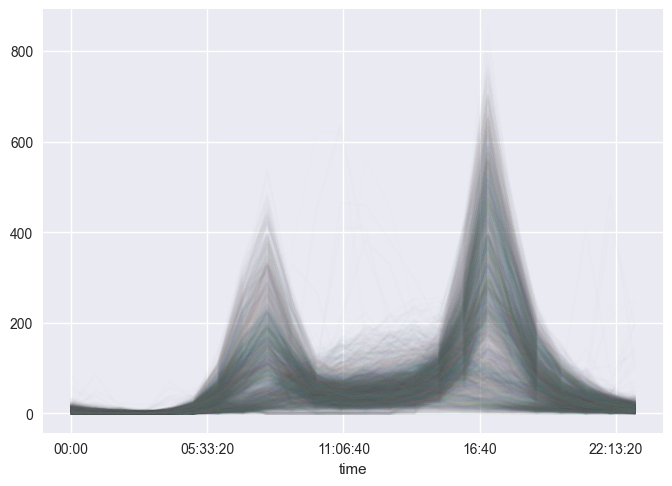

In [2]:
from jupyterworkflow.data import get_fremont_data
data=get_fremont_data()
pivoted=data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False,alpha=0.01)

In [3]:
import numpy as np
np.unique(data.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

## Principal Component Analysis

In [4]:
X=pivoted.fillna(0).T.values
X.shape

X2=PCA(2,svd_solver='full').fit_transform(X)


In [5]:
X2.shape

(3773, 2)

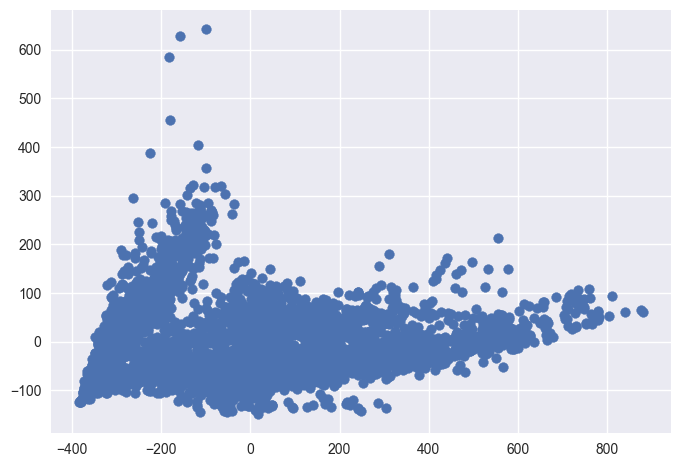

In [6]:
import matplotlib.pyplot as plt
plt.scatter (X2[:,0],X2[:,1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels=gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

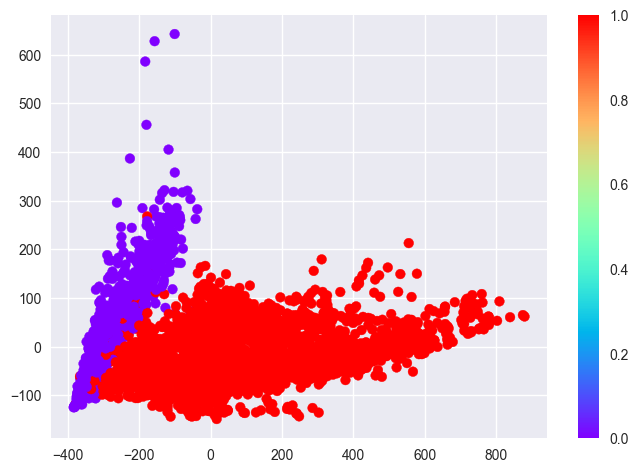

In [8]:
plt.scatter(X2[:,0],X2[:,1],c=labels,cmap='rainbow')
plt.colorbar()

Text(0.5, 1.0, 'Red Cluster')

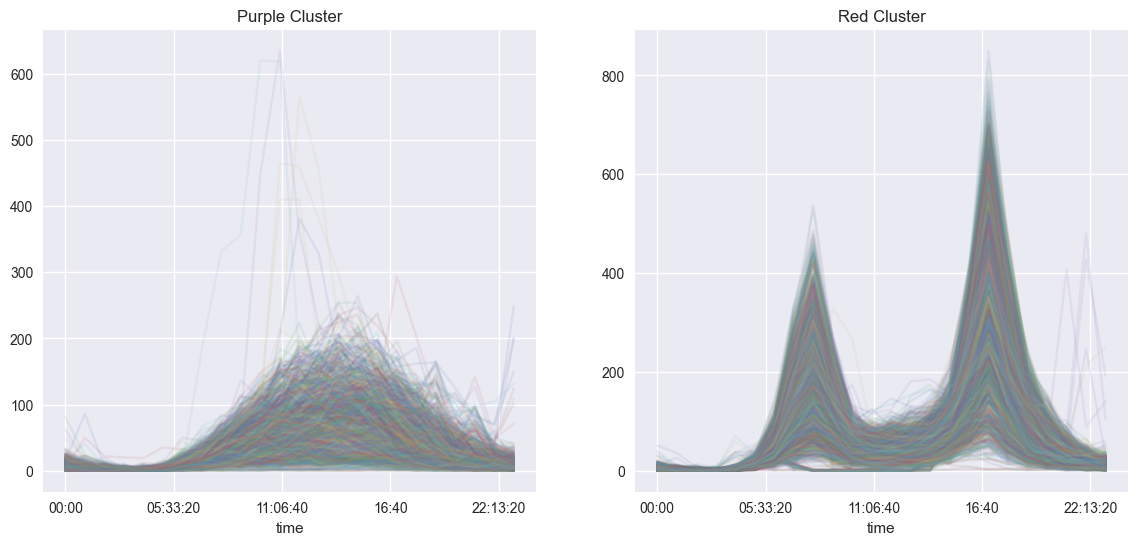

In [9]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

pivoted.T[labels==0].T.plot(legend=False,alpha=0.1,ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False,alpha=0.1,ax=ax[1])
ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Compare with Day of Week

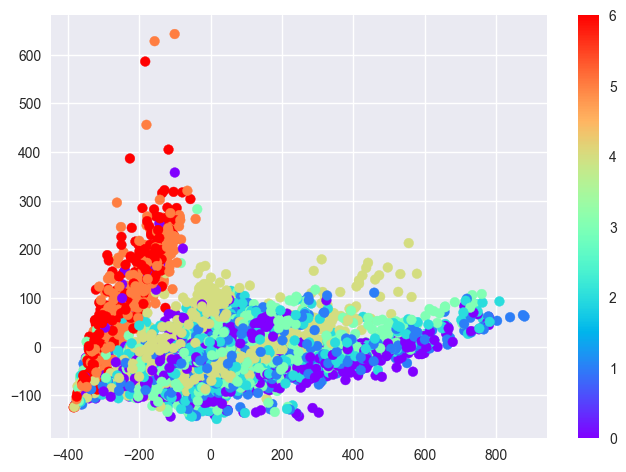

In [10]:
dayofweek=pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:,0],X2[:,1],c=dayofweek,cmap='rainbow')
plt.colorbar()

## Analyzing Outliers
The following points are weekdays with a holiday like pattern

In [11]:
dates=pd.DatetimeIndex(pivoted.columns)
dates[(labels==1)&(dayofweek<5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', length=2592, freq=None)

What's up with Feb 6,2017? Snowstorm